<a href="https://colab.research.google.com/github/mohammed893/Brain_Tumor_FCI/blob/main/FCI_Project_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [6]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/adityakomaravolu/brain-tumor-mri-images?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammed165
Your Kaggle Key: ··········


100%|██████████| 175M/175M [00:09<00:00, 19.9MB/s]


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf


In [8]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'

batch_size = 32
img_height = 224
img_width = 224

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [10]:
val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [11]:
class_names= train_data.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


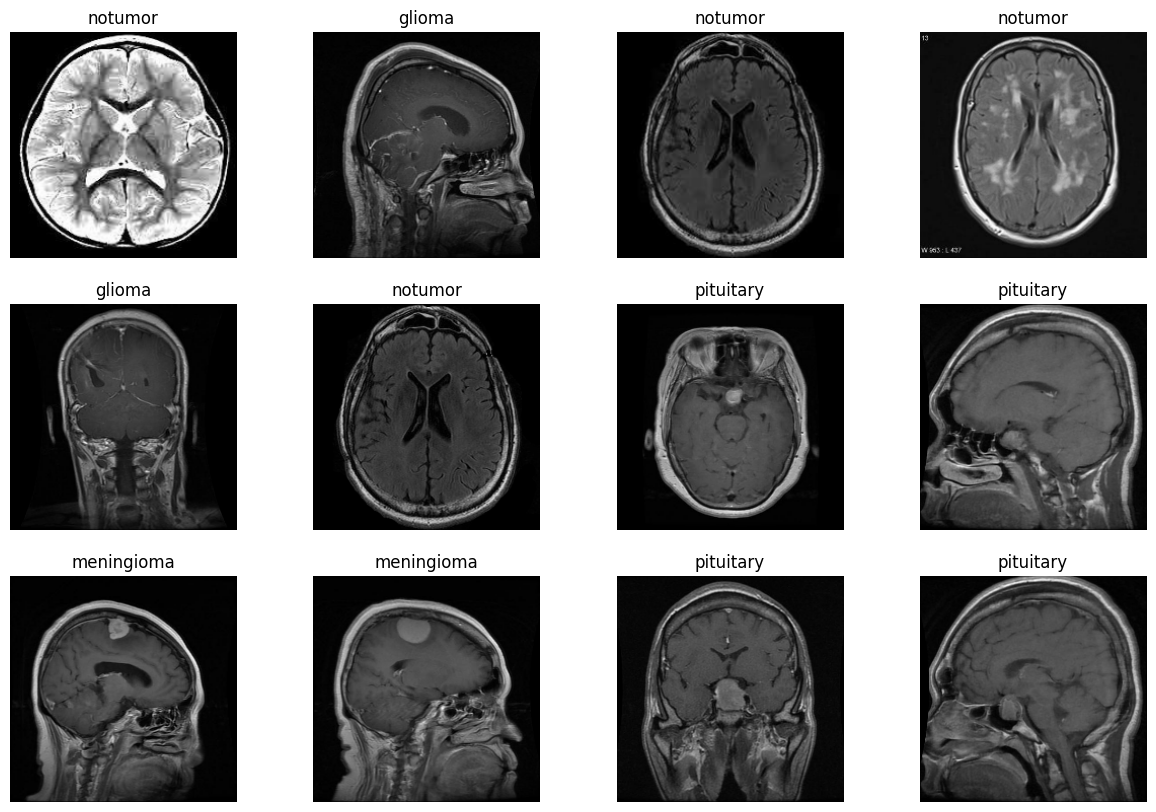

In [12]:
plt.figure(figsize=(15, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
meningioma = 0
notumor = 0
glioma = 0
pituitary = 0

for images, labels in train_data:
    for i in range(len(images)):
        #print(class_names[labels[i]])
        if class_names[labels[i]] == 'meningioma':
            meningioma +=1
        elif class_names[labels[i]] == 'notumor':
            notumor +=1
        elif class_names[labels[i]] == 'glioma':
            glioma +=1
        elif class_names[labels[i]] == 'pituitary':
            pituitary +=1


print('meningioma : ', meningioma)
print('glioma : ', glioma)
print('pituitary : ', pituitary)
print('notumor : ', notumor)

meningioma :  1090
glioma :  1077
pituitary :  1156
notumor :  1247


In [14]:
fig=px.pie(values = [meningioma+glioma+pituitary,notumor], names=['tumor','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [15]:
fig = go.Figure(go.Bar(
            x= [meningioma,glioma,pituitary,notumor],
            y= ['meningioma','glioma','pituitary','notumor'],
            orientation='h'))

fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45)


fig.show()

In [16]:
fig=px.pie(values = [meningioma,glioma,pituitary,notumor], names=['meningioma','glioma','pituitary','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

#Training a CNN on all the data without Data augmentation Or Transfer Learning

In [17]:
from keras.preprocessing.image import ImageDataGenerator

trainDataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
testDataGenerator = ImageDataGenerator(rescale=1./255)

In [18]:
train_d = trainDataGenerator.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")


Found 4571 images belonging to 4 classes.


In [19]:
valid_d = trainDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)

Found 1141 images belonging to 4 classes.


In [20]:
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))

Found 1311 images belonging to 4 classes.


In [21]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt

In [22]:
Model_1_Normal_CNN = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])

In [23]:
Model_1_Normal_CNN.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [24]:
history_1_CNN = Model_1_Normal_CNN.fit(train_d,validation_data=valid_d,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
286/286 [==============================] - 57s 164ms/step - loss: 0.3886 - accuracy: 0.6259 - val_loss: 0.4372 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 2/5
286/286 [==============================] - 41s 143ms/step - loss: 0.2600 - accuracy: 0.7716 - val_loss: 0.3391 - val_accuracy: 0.7555 - lr: 0.0010
Epoch 3/5
286/286 [==============================] - 41s 142ms/step - loss: 0.2291 - accuracy: 0.8079 - val_loss: 0.3027 - val_accuracy: 0.7669 - lr: 0.0010
Epoch 4/5
286/286 [==============================] - 40s 142ms/step - loss: 0.1763 - accuracy: 0.8639 - val_loss: 0.2988 - val_accuracy: 0.7660 - lr: 0.0010
Epoch 5/5
286/286 [==============================] - 43s 149ms/step - loss: 0.1505 - accuracy: 0.8838 - val_loss: 0.2831 - val_accuracy: 0.8133 - lr: 0.0010


In [27]:
def plotRes(history):
    plt.figure(1, figsize = (15,8))

    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])

    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])

    plt.show()

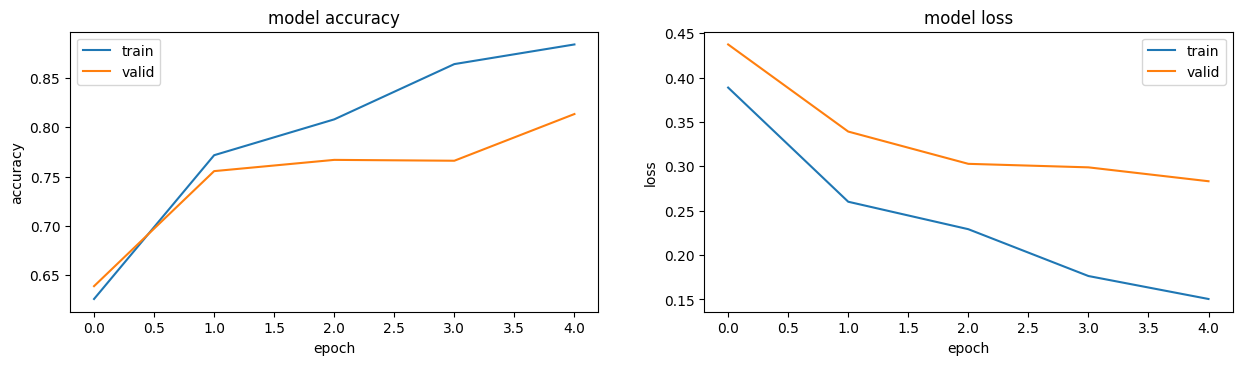

In [28]:
plotRes(history_1_CNN)

#Build Model_2 (same CNN but With Data Augmentation on FULL DATA):

In [30]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
trainDataGenerator_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2 ,
                                             rotation_range = 0.2 ,##--> Range
                                             shear_range = 0.2 ,##--> Range
                                             zoom_range = 0.2 ,##--> Range
                                             width_shift_range = 0.2 ,##--> Range
                                             height_shift_range = 0.3,##--> Range
                                             horizontal_flip = True)



testDataGenerator = ImageDataGenerator(rescale=1./255)



train_d = trainDataGenerator_aug.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")
valid_d = trainDataGenerator_aug.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))



Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [31]:
Model_2_CNN_DataAug = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])
Model_2_CNN_DataAug.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]


In [32]:
history_2_CNN_DataAug = Model_2_CNN_DataAug.fit(train_d,validation_data=valid_d,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
286/286 [==============================] - 45s 151ms/step - loss: 0.5428 - accuracy: 0.3640 - val_loss: 0.5258 - val_accuracy: 0.5083 - lr: 0.0010
Epoch 2/5
286/286 [==============================] - 42s 148ms/step - loss: 0.4710 - accuracy: 0.5060 - val_loss: 0.4790 - val_accuracy: 0.6152 - lr: 0.0010
Epoch 3/5
286/286 [==============================] - 43s 151ms/step - loss: 0.4200 - accuracy: 0.5811 - val_loss: 0.4525 - val_accuracy: 0.6687 - lr: 0.0010
Epoch 4/5
286/286 [==============================] - 43s 151ms/step - loss: 0.3746 - accuracy: 0.6379 - val_loss: 0.4216 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 5/5
286/286 [==============================] - 43s 151ms/step - loss: 0.3495 - accuracy: 0.6935 - val_loss: 0.3919 - val_accuracy: 0.6652 - lr: 0.0010


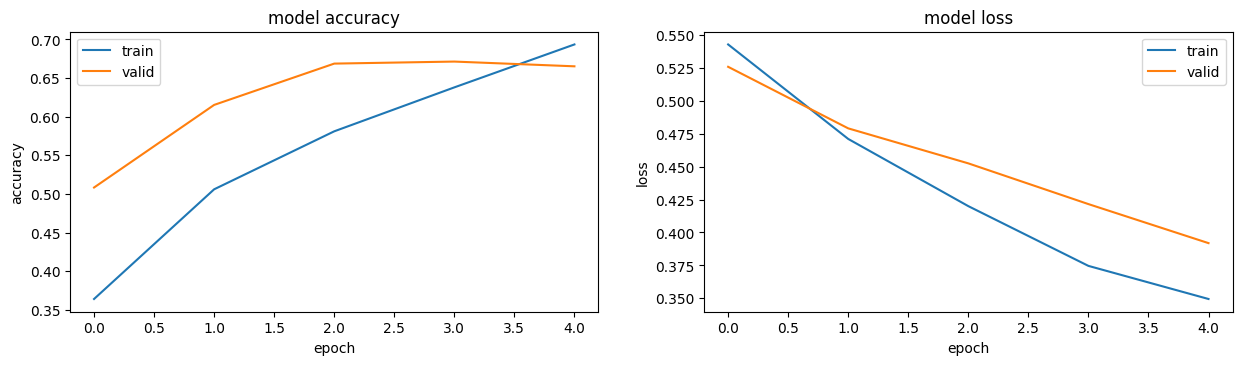

In [33]:
plotRes(history_2_CNN_DataAug)

#Trying with more Time

In [34]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
trainDataGenerator_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2 ,
                                             rotation_range = 0.2 ,##--> Range
                                             shear_range = 0.2 ,##--> Range
                                             zoom_range = 0.2 ,##--> Range
                                             width_shift_range = 0.2 ,##--> Range
                                             height_shift_range = 0.3,##--> Range
                                             horizontal_flip = True)



testDataGenerator = ImageDataGenerator(rescale=1./255)



train_d = trainDataGenerator_aug.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")
valid_d = trainDataGenerator_aug.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))
Model_3_CNN_DataAug = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])
Model_3_CNN_DataAug.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]
history_3_CNN_DataAug = Model_3_CNN_DataAug.fit(train_d,validation_data=valid_d,epochs=20,verbose=1,callbacks=callback_list)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/20
286/286 [==============================] - 45s 151ms/step - loss: 0.5664 - accuracy: 0.3562 - val_loss: 0.5471 - val_accuracy: 0.4470 - lr: 0.0010
Epoch 2/20
286/286 [==============================] - 44s 153ms/step - loss: 0.4826 - accuracy: 0.4820 - val_loss: 0.4944 - val_accuracy: 0.5925 - lr: 0.0010
Epoch 3/20
286/286 [==============================] - 44s 153ms/step - loss: 0.4346 - accuracy: 0.5541 - val_loss: 0.4877 - val_accuracy: 0.5329 - lr: 0.0010
Epoch 4/20
286/286 [==============================] - 43s 150ms/step - loss: 0.4080 - accuracy: 0.5942 - val_loss: 0.4171 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 5/20
286/286 [==============================] - 42s 148ms/step - loss: 0.3857 - accuracy: 0.6080 - val_loss: 0.4052 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 6/20
286/286 [==============================] - 42s 148ms/step - loss: 0.3748 

#Trying EfficientNetB0

In [36]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
IMG_SIZE = (224 , 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir ,
    image_size = IMG_SIZE ,
    label_mode = "categorical" ,
    batch_size = BATCH_SIZE ,)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir ,
    image_size = IMG_SIZE ,
    label_mode = "categorical" ,
    batch_size = BATCH_SIZE ,)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [38]:
base_model_1 = tf.keras.applications.EfficientNetB0(include_top = False)
base_model_1.trainable = False
inputs = tf.keras.layers.Input(shape = (224 , 224 , 3) , name = "input_layer")
x = base_model_1(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pooling_layer")(x)
outputs = tf.keras.layers.Dense(4 , activation = "softmax" , name = "output_layer")(x)
model_EffNet1 = tf.keras.Model(inputs , outputs)
model_EffNet1.compile(
    loss = tf.keras.losses.categorical_crossentropy ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ['accuracy']
)

#10. Fit the model
model_EffNet_hist = model_EffNet1.fit(train_data,validation_data=test_data,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
179/179 [==============================] - 30s 120ms/step - loss: 0.6266 - accuracy: 0.7735 - val_loss: 0.4552 - val_accuracy: 0.8284 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - 16s 86ms/step - loss: 0.3649 - accuracy: 0.8754 - val_loss: 0.3840 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - 16s 88ms/step - loss: 0.3067 - accuracy: 0.8920 - val_loss: 0.3409 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 4/5
179/179 [==============================] - 16s 87ms/step - loss: 0.2719 - accuracy: 0.9051 - val_loss: 0.3001 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 5/5
179/179 [==============================] - 16s 85ms/step - loss: 0.2504 - accuracy: 0.9130 - val_loss: 0.2939 - val_accuracy: 0.8863 - lr: 0.0010


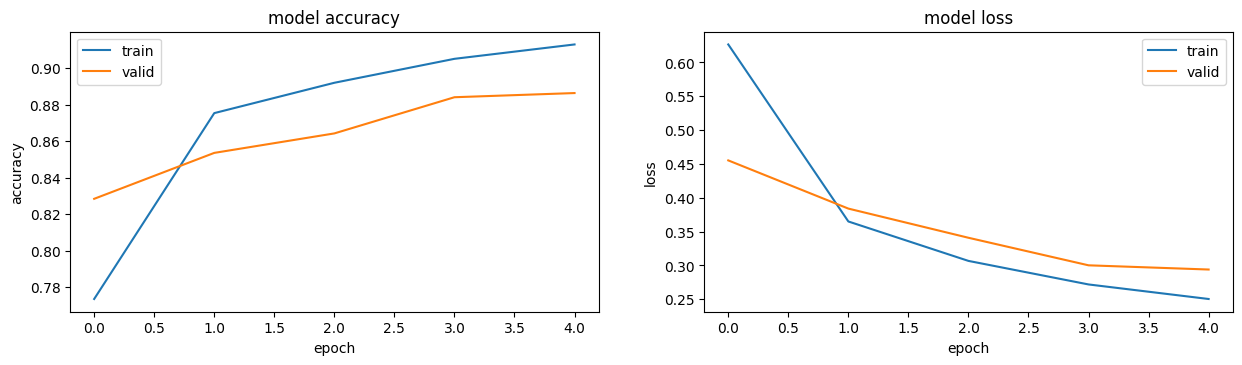

In [39]:
plotRes(model_EffNet_hist)

#Trying Feature extraction with Data Augmentation Layer

In [59]:
IMG_SIZE = (224 , 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir  ,
                                                                            batch_size = 32 ,
                                                                            label_mode = "categorical",
                                                                            image_size = (224 , 224))


test_data = tf.keras.preprocessing.image_dataset_from_directory(            test_dir  ,
                                                                            batch_size = 32 ,
                                                                            label_mode = "categorical",
                                                                            image_size = (224 , 224))

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [42]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal") ,
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255.)  --> we don't need it with Efficient-net
], name = "Data-Augmentation")

In [62]:
input_shape = (224 , 224 , 3)

#Create a frozen base Model (backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and the outputs
inputs = layers.Input(shape = input_shape , name = "Input_layer")
x = data_augmentation(inputs)
x = base_model(x , training = False)
x = layers.GlobalAveragePooling2D(name = "Global_avg_pool2D")(x)
outputs = layers.Dense(4 , activation = "softmax" , name = "Outputs")(x)

model_2 = tf.keras.Model(inputs , outputs)

#Compile
model_2.compile(loss = tf.keras.losses.categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [44]:
#Set CheckPoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
#Create a model checkpoint callback that saves the model's weights only

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path , save_weights_only = True ,
                                                                    save_best_only = True, save_freq = "epoch" #--> Save every epoch
                                                                   ,verbose = 1)

In [63]:
##Fitting Model_2 passing in the modelCheckpoint callback

intitial_epochs = 5

model_2_history = model_2.fit( train_data, epochs = intitial_epochs,
                              validation_data = test_data  ,
                              callbacks = [checkpoint_callback])


Epoch 1/5
179/179 [==============================] - ETA: 0s - loss: 0.6557 - accuracy: 0.7598
Epoch 1: val_loss improved from inf to 0.68974, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
179/179 [==============================] - 125s 652ms/step - loss: 0.6557 - accuracy: 0.7598 - val_loss: 0.6897 - val_accuracy: 0.7025
Epoch 2/5
179/179 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.8468
Epoch 2: val_loss improved from 0.68974 to 0.63229, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
179/179 [==============================] - 80s 445ms/step - loss: 0.4315 - accuracy: 0.8468 - val_loss: 0.6323 - val_accuracy: 0.7315
Epoch 3/5
179/179 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8634
Epoch 3: val_loss improved from 0.63229 to 0.55942, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
179/179 [==============================] - 72s 397ms/step - loss: 0.3807 - accuracy:

In [ ]:
base_model.trainable = True

#Freeze all layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer.name , layer.trainable)

In [65]:
model_2.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ["accuracy"]
                )

In [66]:
#Check which layers are tunable
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number , layer.name , layer.trainable)


0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [67]:
#Fine Tune for another 5 epochs
fine_tune_epochs = intitial_epochs + 5

#Refit the model
Fine_Tuned_Data_Aug_History = model_2.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs-1 #--> Start from previous last epoch
                                    )




Epoch 5/10
179/179 [==============================] - 71s 340ms/step - loss: 0.3047 - accuracy: 0.8873 - val_loss: 0.4739 - val_accuracy: 0.8085
Epoch 6/10
179/179 [==============================] - 51s 283ms/step - loss: 0.2522 - accuracy: 0.9097 - val_loss: 0.4333 - val_accuracy: 0.8299
Epoch 7/10
179/179 [==============================] - 50s 277ms/step - loss: 0.2241 - accuracy: 0.9161 - val_loss: 0.4638 - val_accuracy: 0.8268
Epoch 8/10
179/179 [==============================] - 51s 283ms/step - loss: 0.2108 - accuracy: 0.9247 - val_loss: 0.3282 - val_accuracy: 0.8734
Epoch 9/10
179/179 [==============================] - 45s 249ms/step - loss: 0.1828 - accuracy: 0.9322 - val_loss: 0.3338 - val_accuracy: 0.8680
Epoch 10/10
179/179 [==============================] - 41s 228ms/step - loss: 0.1662 - accuracy: 0.9366 - val_loss: 0.3498 - val_accuracy: 0.8673


In [70]:
#Fine Tune for another 3 epochs
fine_tune_epochs = intitial_epochs+ 4 + 3

#Refit the model
Fine_Tuned_Data_Aug_History = model_2.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+4 #--> Start from previous last epoch
                                    )




Epoch 10/12
179/179 [==============================] - 44s 245ms/step - loss: 0.1547 - accuracy: 0.9401 - val_loss: 0.3374 - val_accuracy: 0.8726
Epoch 11/12
179/179 [==============================] - 42s 231ms/step - loss: 0.1471 - accuracy: 0.9475 - val_loss: 0.2499 - val_accuracy: 0.8963
Epoch 12/12
179/179 [==============================] - 40s 218ms/step - loss: 0.1302 - accuracy: 0.9522 - val_loss: 0.2994 - val_accuracy: 0.8825


In [72]:
#Fine Tune for another 3 epochs
fine_tune_epochs = intitial_epochs+ 4 + 7

#Refit the model
Fine_Tuned_Data_Aug_History = model_2.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+8 #--> Start from previous last epoch
                                    )



Epoch 14/16
179/179 [==============================] - 34s 186ms/step - loss: 0.1121 - accuracy: 0.9590 - val_loss: 0.2793 - val_accuracy: 0.8947
Epoch 15/16
179/179 [==============================] - 38s 205ms/step - loss: 0.1019 - accuracy: 0.9646 - val_loss: 0.2747 - val_accuracy: 0.8963
Epoch 16/16
179/179 [==============================] - 31s 170ms/step - loss: 0.1053 - accuracy: 0.9643 - val_loss: 0.2950 - val_accuracy: 0.8924


In [74]:
#ReCompile
model_2.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ["accuracy"]
                )


In [75]:
fine_tune_epochs = intitial_epochs+ 4 + 9

#Refit the model
Fine_Tuned_Data_Aug_History = model_2.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+10 #--> Start from previous last epoch
                                    )

Epoch 16/18
179/179 [==============================] - 46s 197ms/step - loss: 0.0833 - accuracy: 0.9706 - val_loss: 0.2612 - val_accuracy: 0.9054
Epoch 17/18
179/179 [==============================] - 33s 185ms/step - loss: 0.0798 - accuracy: 0.9709 - val_loss: 0.2754 - val_accuracy: 0.9008
Epoch 18/18
179/179 [==============================] - 32s 173ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.2568 - val_accuracy: 0.9062
